## 1. Viewing the head and get a basic idea about the dataset

In [1]:
import pandas as pd

# Load the Excel file
file_path = 'co2.xlsx'
data = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure
sheet_names = data.sheet_names
sheet_names

['Unit (Million tons)']

In [2]:
# Load the sheet into a DataFrame
df = pd.read_excel(file_path, sheet_name='Unit (Million tons)')

# Display the first few rows to understand its structure
df.head()

,DISTCODE地区代码,County Name,County Name.1,City Name,City Name.1,Province Name,Province Name.1,C1997,C1998,C1999,...,C2008,C2009,C2010,C2011,C2012,C2013,C2014,C2015,C2016,C2017
0,340102,瑶海区,Yaohai District,合肥市,Hefei City,安徽省,Anhui Province,1.630068,1.538689,1.624000,...,3.371323,3.671851,3.990198,4.329686,4.348723,4.260311,4.180913,3.761643,3.755699,3.530521
1,340103,庐阳区,Luyang District,合肥市,Hefei City,安徽省,Anhui Province,1.192053,1.107413,1.170043,...,2.550246,2.777581,2.990014,3.171642,3.184190,3.119548,3.144285,2.883247,2.958616,2.908487
2,340104,蜀山区,Shushan District,合肥市,Hefei City,安徽省,Anhui Province,1.818297,1.692765,1.734692,...,4.180137,4.552764,4.888732,5.195696,5.218322,5.111806,4.963425,4.458935,4.437808,4.163056
3,340111,包河区,Baohe District,合肥市,Hefei City,安徽省,Anhui Province,1.557845,1.459316,1.477286,...,3.123715,3.423478,3.684567,4.145091,4.160545,4.091217,4.140434,3.792264,3.827954,3.682674
4,340121,长丰县,Changfeng County,合肥市,Hefei City,安徽省,Anhui Province,1.488242,1.471248,1.520304,...,4.413437,4.808134,5.275954,5.982387,6.481649,6.583311,6.956167,6.673773,7.097350,7.081446


## 2. $CO_2$ emission in China each year

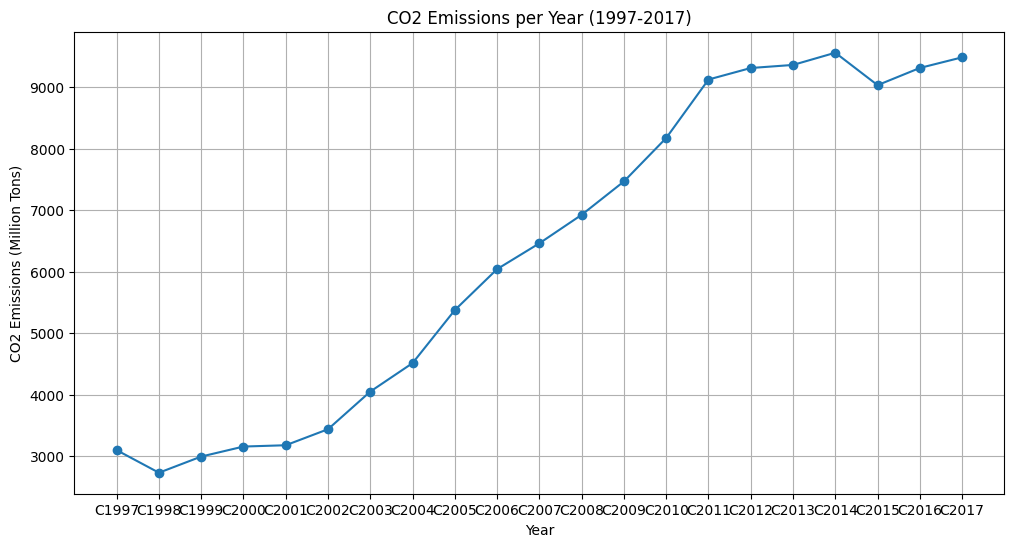

In [3]:
import matplotlib.pyplot as plt

# Extract columns for the years (C1997 to C2017)
year_columns = [col for col in df.columns if (col.startswith('C1') or col.startswith('C2'))]

# Convert relevant columns to numeric to handle potential data type issues
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the sum for each year
yearly_sum = df[year_columns].sum()

# Plot the averages
plt.figure(figsize=(12, 6))
plt.plot(yearly_sum.index, yearly_sum.values, marker='o')
plt.title('CO2 Emissions per Year (1997-2017)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Million Tons)')
plt.grid(True)
plt.show()


## 3. Linear Regression on the emission

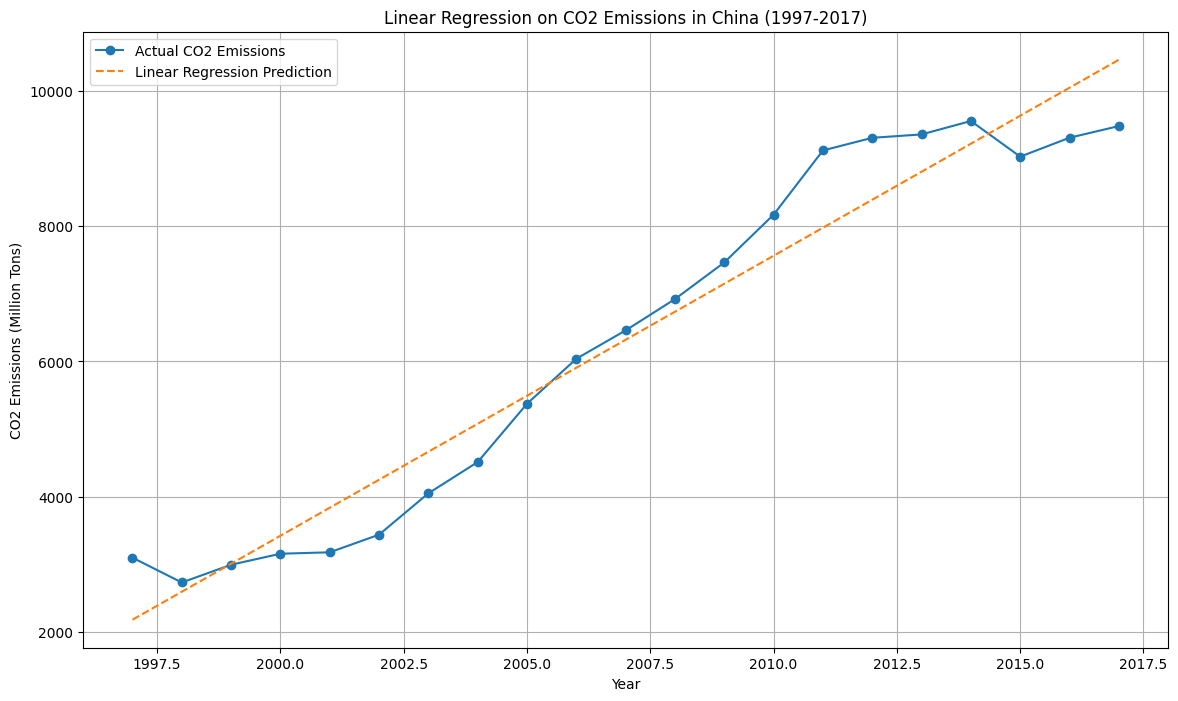

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for linear regression
years = np.array([int(year[1:]) for year in year_columns]).reshape(-1, 1)
yearly_sum_values = yearly_sum.values.reshape(-1, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(years, yearly_sum_values)
predicted_emissions = model.predict(years)

# Plot the actual data and the linear regression prediction
plt.figure(figsize=(14, 8))
plt.plot(years, yearly_sum_values, label='Actual CO2 Emissions', marker='o')
plt.plot(years, predicted_emissions, label='Linear Regression Prediction', linestyle='--')
plt.title('Linear Regression on CO2 Emissions in China (1997-2017)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Million Tons)')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
df_unique = df.loc[:, ~df.columns.duplicated()]
# Group by 'Province Name' and calculate the mean CO2 trends over the years
co2_trends_by_province = df_unique.groupby('Province Name.1').sum(numeric_only=True).filter(like='C', axis=1)

print(co2_trends_by_province.shape)

co2_trends_by_province.head()

(30, 21)


,C1997,C1998,C1999,C2000,C2001,C2002,C2003,C2004,C2005,C2006,...,C2008,C2009,C2010,C2011,C2012,C2013,C2014,C2015,C2016,C2017
Province Name.1,,,,,,,,,,,,,,,,,,,,,
Anhui Province,105.710259,102.212637,106.557469,113.488162,109.081252,119.771564,140.083725,154.258369,179.984658,203.226901,...,234.682158,255.934941,282.843380,320.142961,328.203887,325.786148,333.548504,312.776887,326.154387,322.924659
Beijing City,42.455765,41.567679,42.949390,45.527737,44.121674,48.128770,55.155735,60.108232,67.064334,74.793181,...,78.230200,86.428238,90.907221,80.724159,83.373600,66.502344,67.659406,63.590340,67.416509,60.086432
Chongqing City,63.159714,61.869957,63.319661,66.997304,64.041476,69.912763,80.474199,87.616514,99.465466,111.040965,...,118.989586,130.997845,141.018922,147.639407,151.849575,148.569240,152.420743,140.740816,145.617956,153.752263
Fujian Province,68.246954,64.906731,70.863577,75.662173,73.308691,79.722719,92.981409,102.044674,118.937646,134.531684,...,154.479924,169.284285,188.393095,224.190229,229.215137,233.921608,236.961898,217.892824,224.925959,229.985367
Gansu Province,54.000239,51.989335,54.046246,57.163607,55.482389,60.115147,69.254957,75.884426,88.087094,99.032372,...,112.837438,124.000038,138.246307,163.391051,166.864951,167.887815,171.729710,158.320895,163.582055,171.372945


## 4. Visualized $CO_2$ emission trend by province

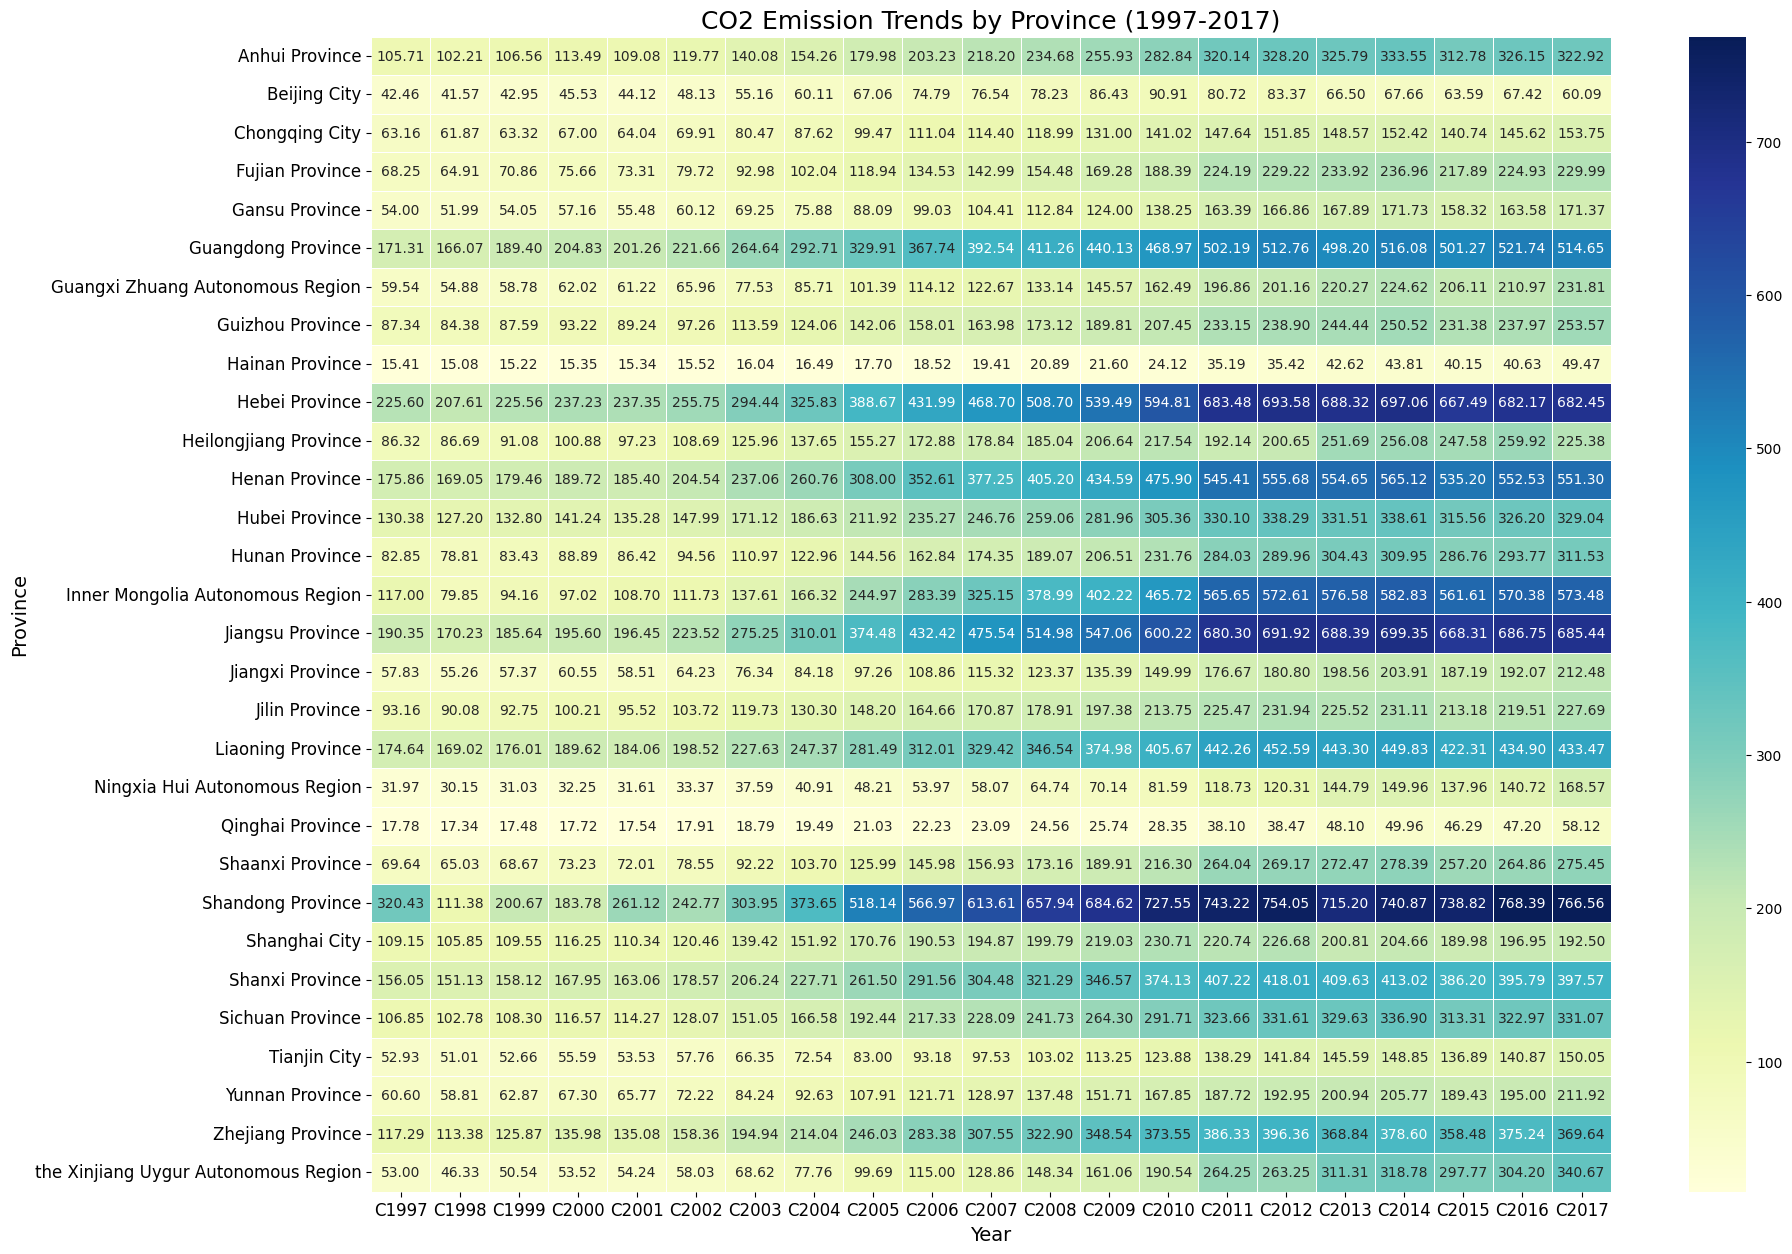

In [6]:
import seaborn as sns

# Plot a heat map for CO2 emission trends by province
plt.figure(figsize=(20, 15))
sns.heatmap(
    co2_trends_by_province,
    cmap='YlGnBu',
    linewidths=0.5,
    annot=True,
    fmt=".2f"
)
plt.title('CO2 Emission Trends by Province (1997-2017)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Province', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## 5. Highest versus lowest emission province

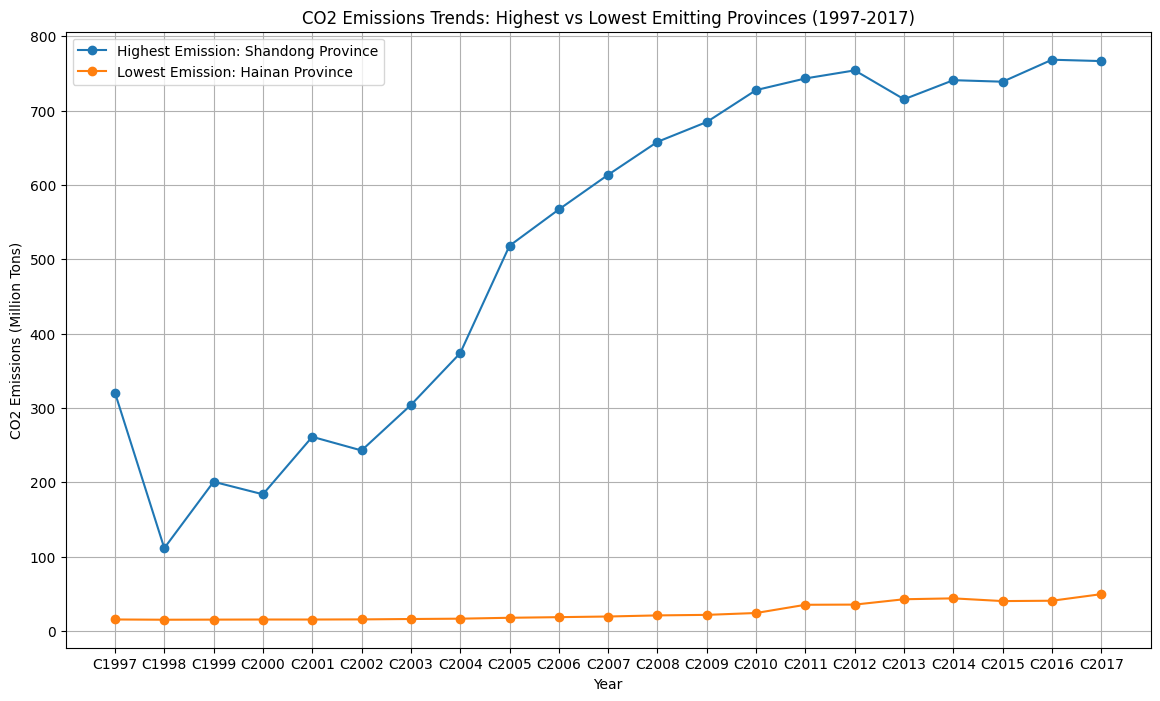

In [7]:
# Identify the province with the highest and lowest average CO2 emissions over the years
average_emissions = co2_trends_by_province.mean(axis=1)
highest_emission_province = average_emissions.idxmax()
lowest_emission_province = average_emissions.idxmin()

# Extract their emission trends over the years
highest_emission_trend = co2_trends_by_province.loc[highest_emission_province]
lowest_emission_trend = co2_trends_by_province.loc[lowest_emission_province]

# Plot the trends for comparison
plt.figure(figsize=(14, 8))
plt.plot(highest_emission_trend.index, highest_emission_trend.values, marker='o', label=f'Highest Emission: {highest_emission_province}')
plt.plot(lowest_emission_trend.index, lowest_emission_trend.values, marker='o', label=f'Lowest Emission: {lowest_emission_province}')
plt.title('CO2 Emissions Trends: Highest vs Lowest Emitting Provinces (1997-2017)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Million Tons)')
plt.legend()
plt.grid(True)
plt.show()
